Kaggle competition : https://www.kaggle.com/competitions/digit-recognizer/overview

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from keras.utils.np_utils import to_categorical

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


Importing Dataset

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Normalization and reshaping

In [ ]:
X = train.drop(['label'], 1).values
y = train['label'].values

test_x = test.values

X = X / 255.0
test_x = test_x / 255.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Reshape images into 3 dimensions



In [ ]:
X = X.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)
y = to_categorical(y)

Split training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

I choose to split the dataset in two parts: 
90% for training 
10% for testing

Defining the model

I have used the Sequential API. 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
keras.backend.clear_session()

model=Sequential()

# model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(keras.layers.BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
# optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

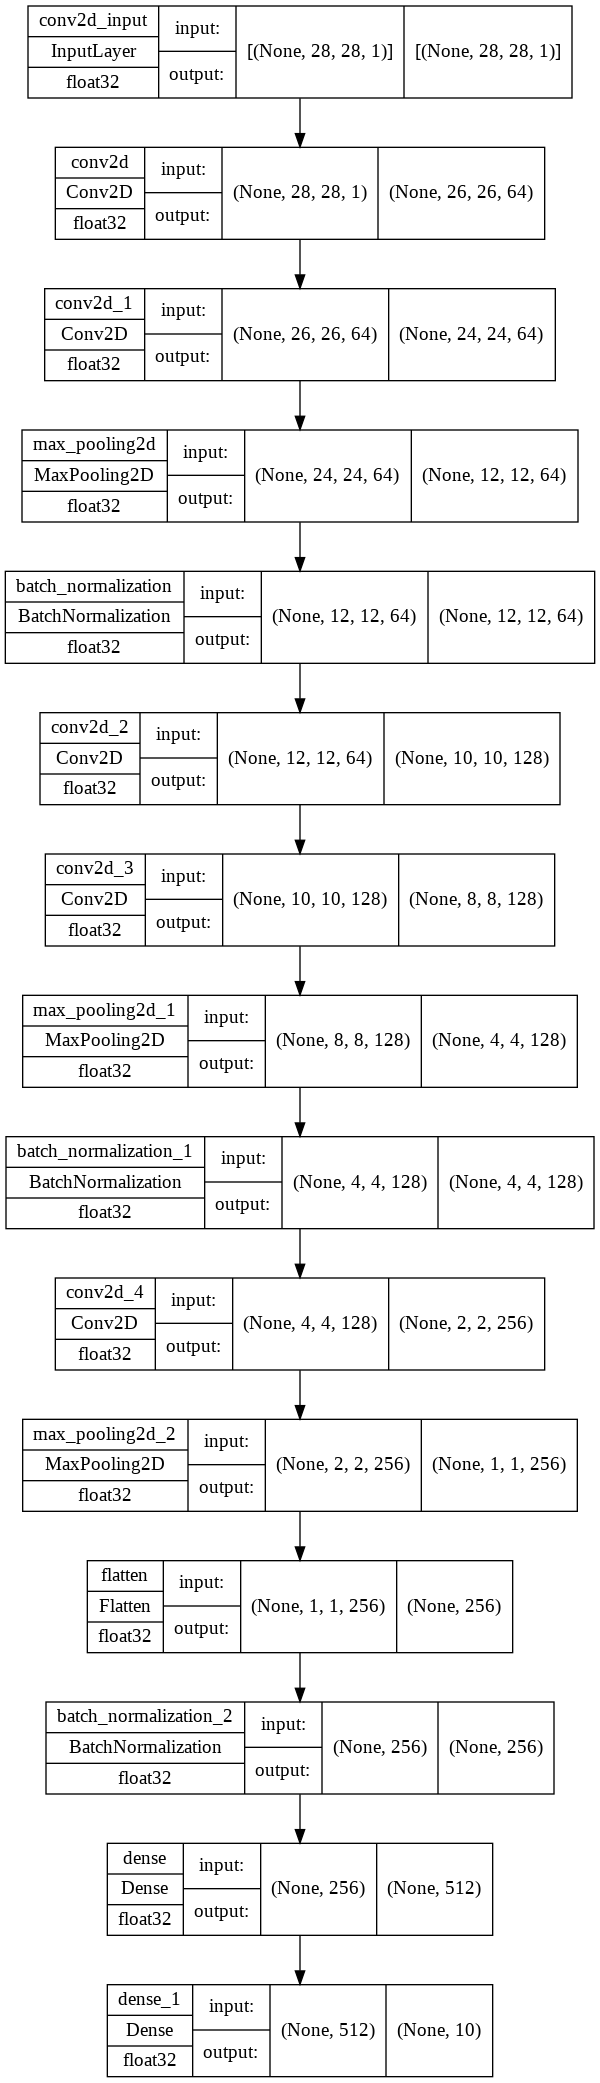

In [ ]:
keras.utils.plot_model(model, show_dtype=True, show_shapes=True, 
                       show_layer_names=True)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Epoch 1/30
1182/1182 [==============================] - 43s 15ms/step - loss: 0.1871 - accuracy: 0.9524 - val_loss: 0.0834 - val_accuracy: 0.9783
Epoch 2/30
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0755 - accuracy: 0.9790 - val_loss: 0.0865 - val_accuracy: 0.9750
Epoch 3/30
1182/1182 [==============================] - 17s 15ms/step - loss: 0.0603 - accuracy: 0.9831 - val_loss: 0.0706 - val_accuracy: 0.9817
Epoch 4/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0508 - accuracy: 0.9860 - val_loss: 0.0499 - val_accuracy: 0.9862
Epoch 5/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0400 - accuracy: 0.9887 - val_loss: 0.0366 - val_accuracy: 0.9898
Epoch 6/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0402 - accuracy: 0.9894 - val_loss: 0.0395 - val_accuracy: 0.9881
Epoch 7/30
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0388 - accuracy: 0.9888 - val_loss: 0.0350 -

Predication validation

In [ ]:
y_test[10].argmax()

7

Real label of X_test[10] =  7

In [ ]:
y_pred_print =  model.predict(X_test)
y_pred_print[10].argmax()

7

Predicted label of X_test[10] =  7

Visualization of accuracy and loss


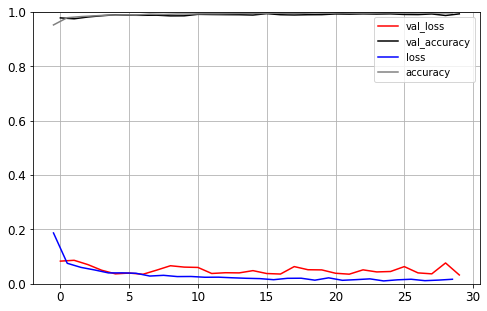

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

colors=[#"blue", "gray", #  loss      accuracy
        "red", "black"] #   val_loss  val_accuracy
                               #df[ ["val_loss","val_accuracy"] ].plot(figsize=(8,5), color=colors)
pd.DataFrame( history.history )[["val_loss","val_accuracy"]].plot(figsize=(8,5), color=colors)

# the validation error is computed at the end of each epoch, while the training error is
# computed using a running mean during each epoch. So the training curve should be shifted by
# half an epoch to the left.
#shift(-0.5)
         #1D array                #list
plt.plot(np.arange(-0.5,29,1), history.history["loss"], c="blue", label="loss")    #must be put after previous code for plotting Dataframe
plt.plot(np.arange(-0.5,29,1), history.history["accuracy"], c="gray", label="accuracy")#must be put after previous code for plotting Dataframe
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

Kaggle Submission File

In [ ]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)


results = model.predict(test_x)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission_1.csv",index=False)


KAGGLE RANK

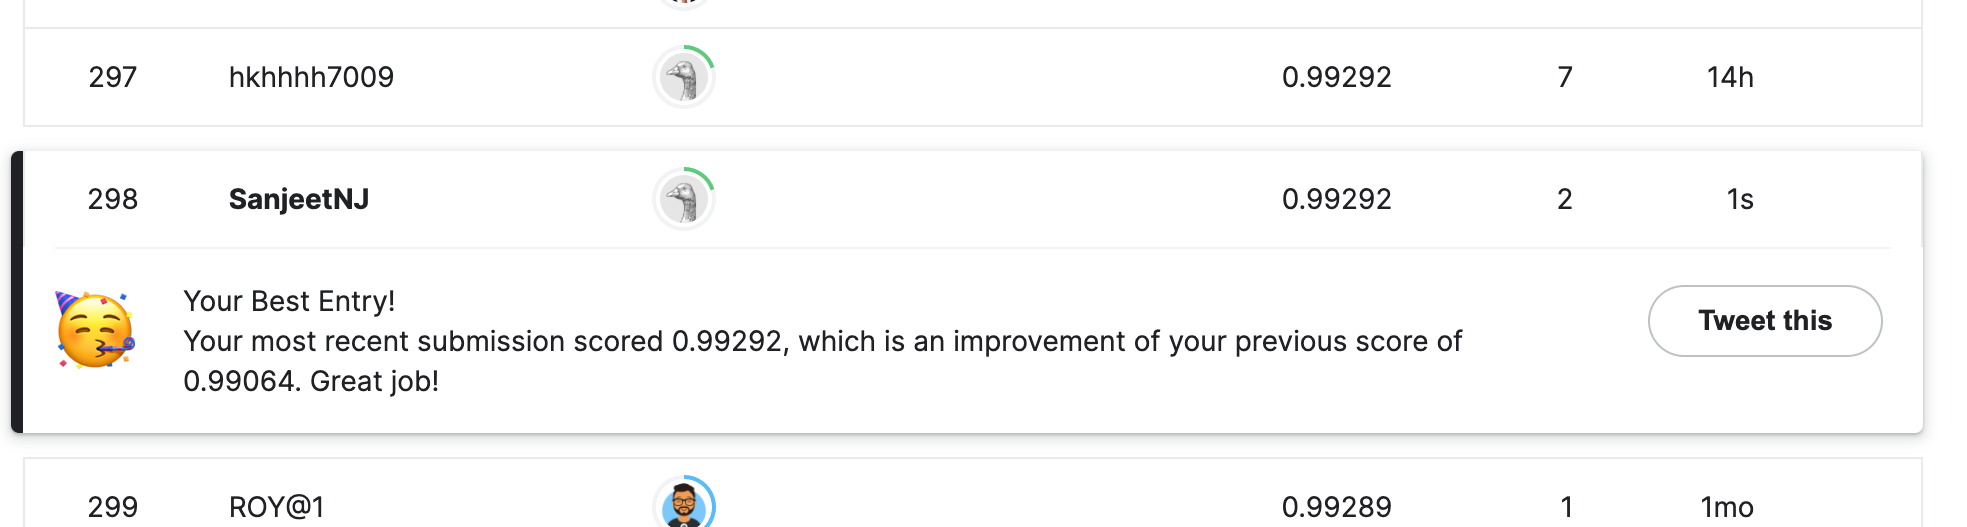